In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("master.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
df.drop(['country-year', 'HDI for year'], axis = 1, inplace = True)

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [6]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides', 'population', 'suicides/100k', 'gdp_year', 'gdp_capita', 'generation']
df['gdp_year'] = df.gdp_year.str.replace(',','').astype('float')

In [7]:
df = df[df['suicides/100k'] != 0]

In [8]:
df.age = df.age.astype('category').cat.set_categories(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], ordered = True)

C:\Users\P1348802\AppData\Local\Temp\ipykernel_40400\525362714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age = df.age.astype('category').cat.set_categories(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], ordered = True)


<Axes: xlabel='age', ylabel='suicides/100k'>

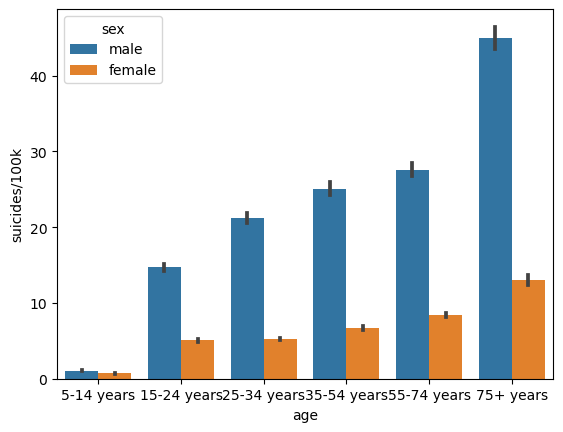

In [9]:
sns.barplot(x = 'age', y = 'suicides/100k', hue = 'sex', data = df)

In [10]:
df.dtypes

country            object
year                int64
sex                object
age              category
suicides            int64
population          int64
suicides/100k     float64
gdp_year          float64
gdp_capita          int64
generation         object
dtype: object

<Axes: xlabel='gdp_capita', ylabel='suicides/100k'>

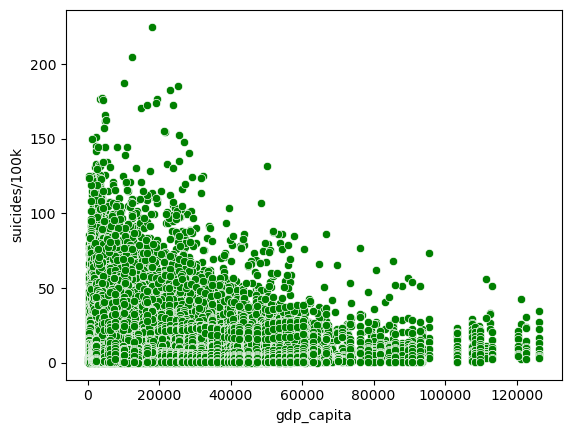

In [11]:
sns.scatterplot(x = 'gdp_capita', y ='suicides/100k' , data = df, color = 'green')

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("master.csv")

In [16]:
df.loc[df['suicides_no'].isnull()].head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [17]:
null_Values=df[df["suicides_no"].isnull()]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=df.dropna()

In [20]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
# group data by year and calculate the mean suicide rate for each year
Df = df.groupby("year").mean()["suicides_no"]

C:\Users\P1348802\AppData\Local\Temp\ipykernel_40400\3007923711.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Df = df.groupby("year").mean()["suicides_no"]


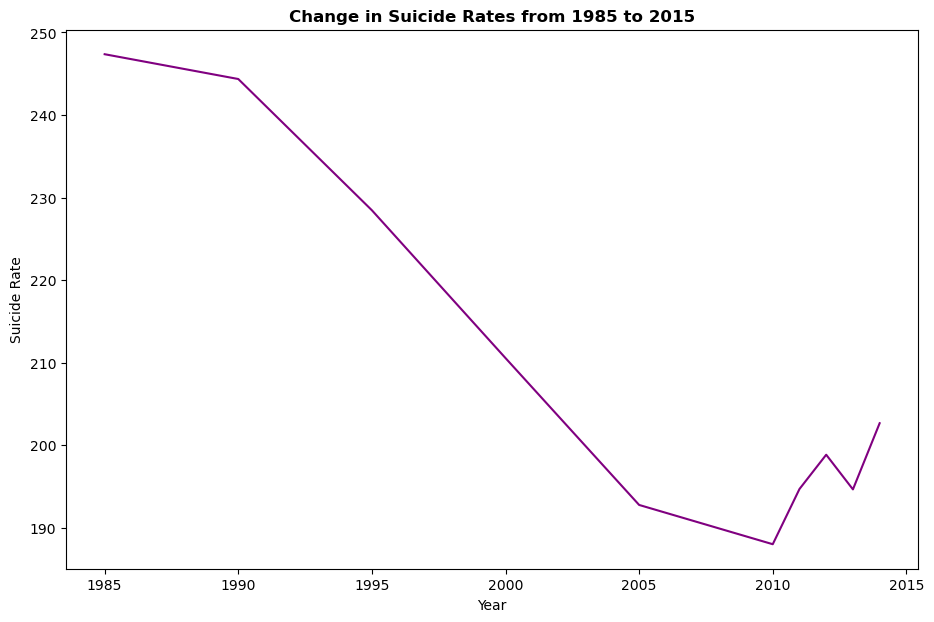

In [29]:
plt.figure(figsize=(11,7))
plt.plot(Df.index, Df.values, color = 'purple')
plt.xlabel("Year")
plt.ylabel("Suicide Rate")
plt.title("Change in Suicide Rates from 1985 to 2015",fontdict={"fontweight":"bold","fontsize":12})
plt.show()